In [1]:
# Import dependencies
import pandas as pd
import numpy as np # linear algebra

import matplotlib.pyplot as plt
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')
import scipy.stats as st
import datetime
from sklearn import datasets
from scipy.stats import linregress
from citipy import citipy


%matplotlib inline

In [2]:
uber_csv = "Resources/uber-rides-dataset.csv"
uber_df = pd.read_csv(uber_csv)
uber_df.head()

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,trip_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,"May 11, 2015 at 6:55PM",Completed,Uber,ee89076fd9da9bddf5f096b0ca42f8d5,05cfeb269e606247fe9d2b6082942c59,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-11 17:26:00,2015-05-11 17:55:00,00:21:33,...,9.29,2015-05-11T17:26:00,12,12,0.69,4.81,0.78,partly-cloudy-day,Mostly Cloudy,none
1,"May 11, 2015 at 8:12PM",Completed,Uber,518be51d403944a03c47e8d1f2c87311,4a4e248742f9d5ff517c5bbbb48d0e54,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-11 18:46:00,2015-05-11 19:12:00,00:19:27,...,9.93,2015-05-11T18:46:00,10,10,0.70,6.53,0.66,partly-cloudy-day,Mostly Cloudy,none
2,"May 13, 2015 at 11:38AM",Completed,Uber,6e460cc8a12c3c6568d0d4a67ac58393,cb249a2bd807ca78697b4ed0348c37da,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-13 09:15:00,2015-05-13 10:38:00,01:06:53,...,18.01,2015-05-13T09:15:00,14,14,0.61,5.25,0.86,partly-cloudy-day,Mostly Cloudy,none
3,"May 16, 2015 at 1:44AM",Completed,Uber,49613a86a04e6c15d72b51d1a2935d81,d3f73f8151c2e8c34b541f961db7f5fa,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-16 00:24:00,2015-05-16 00:44:00,00:13:37,...,5.10,2015-05-16T00:24:00,3,3,0.84,0.87,0.56,partly-cloudy-night,Partly Cloudy,none
4,"May 16, 2015 at 3:18AM",Completed,Uber,9896148fdecdb4c5d977a8691510bdb6,1287d21e6455ee40d4861f6b91c680f4,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,2015-05-16 01:29:00,2015-05-16 02:18:00,00:38:54,...,21.92,2015-05-16T01:29:00,3,1,0.90,1.61,0.31,partly-cloudy-night,Partly Cloudy,none


In [3]:
uber_df.columns

Index(['trip_completed_at', 'trip_status', 'ride_hailing_app', 'trip_uid',
       'driver_uid', 'rider_uid', 'customer', 'trip_start_time',
       'trip_end_time', 'trip_time', 'total_time', 'wait_time', 'trip_type',
       'surge_multiplier', 'vehicle_make_model', 'vehicle_license_plate',
       'driver_name_en', 'vehicle_make', 'vehicle_model', 'driver_gender',
       'driver_photo_url', 'driver_phone_number', 'pickup_lat', 'pickup_long',
       'dropoff_lat', 'dropoff_long', 'trip_map_image_url',
       'trip_path_image_url', 'city', 'country', 'trip_start_address',
       'trip_end_address', 'rub_usd_exchange_rate', 'price_rub', 'price_usd',
       'distance_kms', 'temperature_time', 'temperature_value', 'feels_like',
       'humidity', 'wind_speed', 'cloudness', 'weather_main', 'weather_desc',
       'precipitation'],
      dtype='object')

In [4]:
# Select the Columns we need
distance_type = uber_df.loc[:, ["distance_kms", "price_usd"]]

In [5]:
# Create the bins in which the distances will be held
bins = [0, 5, 10, 15, 20, 47]
#Create the names for the 5 bins
distance_names = ["Very Short Trip", "Short Trip", "Medium Trip", "Long trip", "Very Long Trip"]

In [6]:
# Assign the values to the bins
distance_type["Type of Distance"] = pd.cut(distance_type["distance_kms"], bins, labels=distance_names)
distance_type.head()

,distance_kms,price_usd,Type of Distance
0,9.29,5.17,Short Trip
1,9.93,4.97,Short Trip
2,18.01,13.01,Long trip
3,5.10,25.99,Short Trip
4,21.92,13.43,Very Long Trip


In [7]:
# Calculate average price per distance bin
avg_price = distance_type.groupby(['Type of Distance'])["price_usd"].mean()
avg_price

Type of Distance
Very Short Trip     2.616343
Short Trip          3.871375
Medium Trip         5.554462
Long trip           8.565556
Very Long Trip     13.265588
Name: price_usd, dtype: float64

In [8]:
# Calculate the count per distance bin
count = distance_type.groupby(['Type of Distance']).count()
count

,distance_kms,price_usd
Type of Distance,,
Very Short Trip,175,175
Short Trip,269,269
Medium Trip,130,130
Long trip,36,36
Very Long Trip,68,68


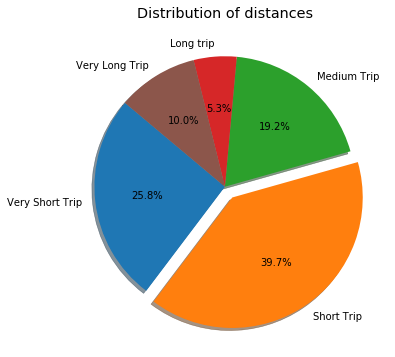

In [9]:
# Columns into arrays
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0, 0.1, 0, 0, 0)
plt.figure(figsize=(10,6))
plt.pie(count.distance_kms, labels=distance_names, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution of distances")
plt.savefig('Images/counttypesoftrip.png')
plt.show()

The above pie chart shows that majority of UBER trips done by the Russian customer is of short distance (5-9Km)

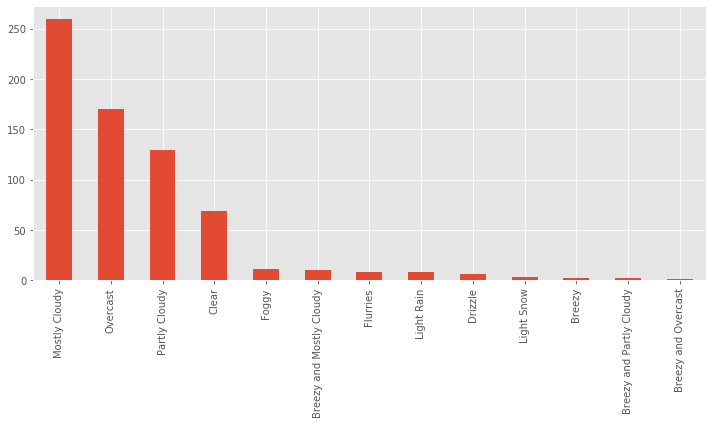

In [10]:
# Plot number of trips for each weather description
x = uber_df['weather_desc'].value_counts().plot(kind='bar', figsize = (10,6))
plt.tight_layout()
plt.savefig('Images/weathercount.png')

The above bar chart shows the trip count for each type of weather. We can see that majority of trips were taken during mostly cloudy days.

The correlation between both factors is 0.08
The r-squared is: 0.07841863329131452


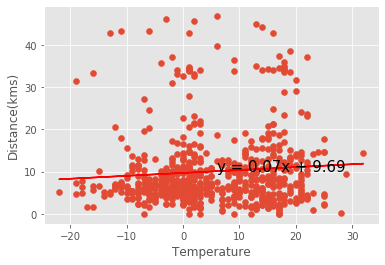

In [11]:
# Let's see if there is a correlation between temperature value and distance in kms. 
x_values = uber_df['temperature_value']
y_values = uber_df['distance_kms']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Temperature')
plt.ylabel('Distance(kms)')
print(f"The r-squared is: {rvalue}")
plt.savefig('Images/tempdistancecorr.png')
plt.show()

Based on the above graph there is no correlation between the temperature value and the distance in kms of Uber trips
since the correlation is only 0.08, very close to 0. The r-squared is also near 0 which means that only 7.8% of the
variance for the Distance (kms) can be explained by the temperature.

In [12]:
# sorting the sata by weather_desc
uber_df = uber_df.sort_values(by='weather_desc', ascending=True)

In [13]:
# Value counts for weather description
weather_count = uber_df.groupby(['weather_desc']).size()
weather_count

weather_desc
Breezy                        2
Breezy and Mostly Cloudy     10
Breezy and Overcast           1
Breezy and Partly Cloudy      2
Clear                        69
Drizzle                       6
Flurries                      8
Foggy                        11
Light Rain                    8
Light Snow                    3
Mostly Cloudy               259
Overcast                    170
Partly Cloudy               129
dtype: int64

In [14]:
avg_temp = uber_df.groupby(['weather_desc'])["temperature_value"].mean()
avg_temp

weather_desc
Breezy                      12.500000
Breezy and Mostly Cloudy    12.300000
Breezy and Overcast         -2.000000
Breezy and Partly Cloudy    18.000000
Clear                       11.579710
Drizzle                      9.333333
Flurries                    -3.125000
Foggy                        0.000000
Light Rain                  11.750000
Light Snow                  -7.666667
Mostly Cloudy                5.471042
Overcast                     0.658824
Partly Cloudy                7.751938
Name: temperature_value, dtype: float64

The correlation between both factors is -0.05
The r-squared is: -0.04999108723490653


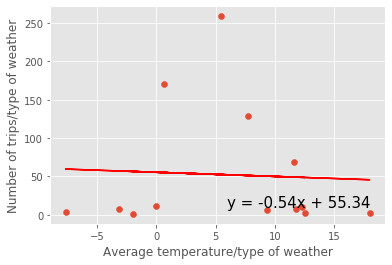

In [15]:
# let's then calculate the correlation between the trip frequency and the average temperature value
x_values = avg_temp
y_values = weather_count
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Average temperature/type of weather')
plt.ylabel('Number of trips/type of weather')
print(f"The r-squared is: {rvalue}")
plt.savefig('Images/avgtempweathercorr.png')
plt.show()

Based on the above graph there is no correlation between the trip frequency and the average temperature value
since the correlation is only -0.05, very close to 0. The r-squared is also near 0 which means that only 5% of the
variance for the trip frequency can be explained by the temperature.

The correlation between both factors is 0.73
The r-squared is: 0.7256684388953664


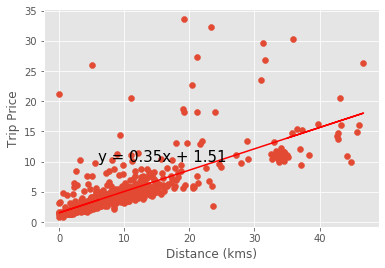

In [16]:
# Let's see if there is a correlation between distance and pricing. 
x_values = uber_df['distance_kms']
y_values = uber_df['price_usd']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Distance (kms)')
plt.ylabel('Trip Price')
print(f"The r-squared is: {rvalue}")
plt.savefig('Images/distanceprice.png')
plt.show()

Based on the above scatter plot there is a moderate correlation between the distance in kms and the trip fare since the correlation number is 0.73, closer to 1. The r-squared is also near 1 which means that 72.6% of the
variance for the trip fare can be explained by the distance in kms. The linear equation shows a positive linear regression line between the 2 variables, which means that an increase in the distance in kms corresponds to an increase in the trip fare.

In [17]:
# Create pie plot for the vehicle make model
vehicle_count = pd.DataFrame(uber_df.groupby(["vehicle_make_model"]).count()).reset_index()
vehicle_count.head()

,vehicle_make_model,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,trip_end_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,Audi A3,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,Audi A6,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,Audi A7,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,Audi Q3,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,BMW 5-series,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [18]:
# Filter the DataFrame down only to those columns to chart
vehicle_count = vehicle_count[["vehicle_make_model","driver_uid"]]
vehicle_count = vehicle_count.rename(columns={"driver_uid": "Count"})
vehicle_count.head()

,vehicle_make_model,Count
0,Audi A3,2
1,Audi A6,4
2,Audi A7,2
3,Audi Q3,2
4,BMW 5-series,4


In [19]:
# Sort data in descending order
vehicle_count = vehicle_count.sort_values('Count', ascending=False)


In [20]:
# the top 5
top_five = vehicle_count[:5].copy()
top_five

,vehicle_make_model,Count
40,Hyundai Solaris,104
115,Volkswagen Polo,61
49,Kia Rio,43
25,Ford Focus,35
67,Nissan Almera,33


In [21]:
# Other vehicles
other_vehicles = pd.DataFrame(data = {
    'vehicle_make_model' : ['others'],
    'Count' : [vehicle_count['Count'][5:].sum()]
})
other_vehicles

,vehicle_make_model,Count
0,others,402


In [22]:
# Combining top 5 with others
top_five_others = pd.concat([top_five, other_vehicles])
top_five_others

,vehicle_make_model,Count
40,Hyundai Solaris,104
115,Volkswagen Polo,61
49,Kia Rio,43
25,Ford Focus,35
67,Nissan Almera,33
0,others,402


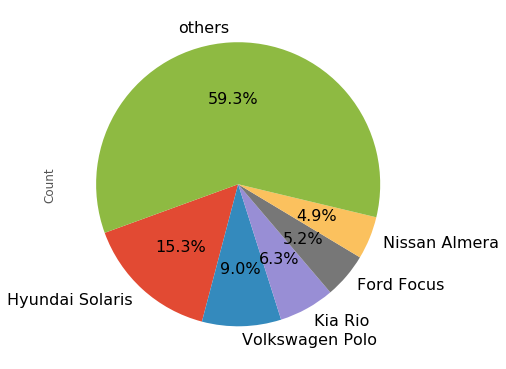

In [23]:
#plotting the 5 top vehicles with the others
plt.figure(figsize=(14,10))
ax1 = plt.subplot(121, aspect='equal')
top_five_others.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=200, shadow=False, labels=top_five_others['vehicle_make_model'], legend = False, fontsize=16)
plt.savefig('Images/vehicletop5.png')

The above pie chart shows the top 5 vehicle make models used by UBER drivers in Russia. 
The 1st one is the Hyunday Solaris, a south Korean car, which is sold as Hyundai Accent in the USA. For the Russian market it is assembled by the TagAZ plant in Taganrog.
The 2nd one is the Volkswagen Polo, a car produced by the German manufacturer Volkswagen since 1975.
The 3rd one is Kia Rio, another South Korean car.

In [24]:
# Set Index to vehicle make model
top_five = top_five.set_index("vehicle_make_model")


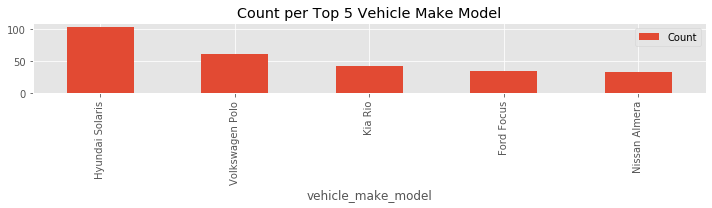

In [25]:
# Plot a bar chart with the same information
top_five.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Count per Top 5 Vehicle Make Model")

plt.tight_layout()
plt.savefig('Images/vehiclecount.png')
plt.show()

In [26]:
# Select the columns needed
prices_box = uber_df.loc[:, ["city", "price_usd", "distance_kms"]]
prices_box["price/km"] = prices_box["price_usd"]/prices_box["distance_kms"]
prices_box.head()

,city,price_usd,distance_kms,price/km
238,Saint Petersburg,3.12,6.12,0.509804
213,Saint Petersburg,2.16,3.22,0.670807
37,Saint Petersburg,2.59,3.07,0.843648
36,Saint Petersburg,3.65,3.35,1.089552
389,Saint Petersburg,10.84,34.13,0.317609


In [27]:
# Sort data by city
df = prices_box.sort_values(['city','price/km'],ascending=True).groupby('city').head().reset_index()

In [28]:
df.describe

<bound method NDFrame.describe of     index              city  price_usd  distance_kms  price/km
0      53      Ekaterinburg       5.91         23.44  0.252133
1      15      Ekaterinburg       2.21          8.40  0.263095
2     123      Ekaterinburg       5.54         20.58  0.269193
3      64      Ekaterinburg       5.90         17.77  0.332020
4      54      Ekaterinburg       5.91         16.38  0.360806
5     362            Moscow       4.98         13.33  0.373593
6     600            Moscow      14.71         35.79  0.411009
7     601            Moscow      20.59         43.15  0.477173
8     356            Moscow       7.68         14.18  0.541608
9     361            Moscow       3.00          4.73  0.634249
10    199  Saint Petersburg       2.63         23.70  0.110970
11    339  Saint Petersburg       9.93         44.90  0.221158
12     48  Saint Petersburg      10.84         44.22  0.245138
13    206  Saint Petersburg       9.38         37.16  0.252422
14    175  Saint Pete

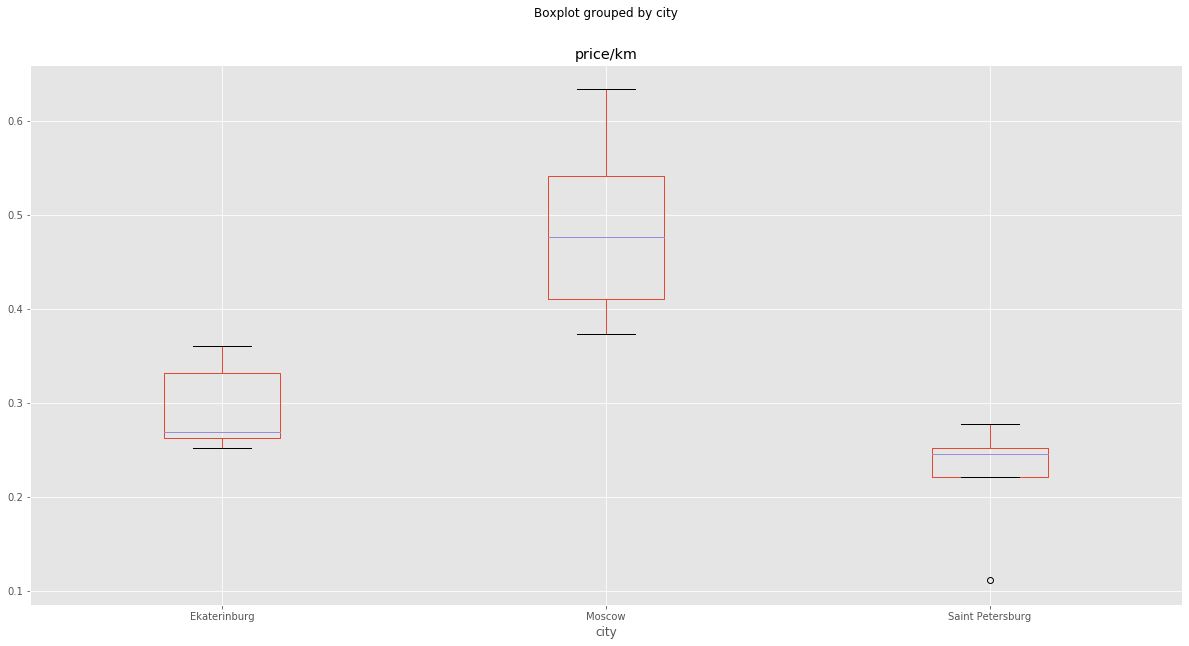

In [29]:
# Create a boxplot to compare prices in the 3 Russian cities
df.boxplot("price/km", by="city", figsize=(20, 10))
plt.savefig('Images/boxplots.png')

The 3 above boxplots show 3 different distributions of prices/km in the 3 Russian cities.
The box plot representing the distribution of prices/km in Saint Petersburg is very short comparted to the other 2, which shows less variability in the data while the boxplot representing prices/km in Moscow shows the highest variability.
While the Moscow boxplot shows a symmetric/normal distribution as the median falls in the middle of the Interquartile range, the other 2 boxplots show a very skewed distribution: the Ekaterinburg boxplot is skewed to the right and the Saint Peterburg is skewed to the left.
The length of the whiskers indicate data's minimum and maximum.
The Saint Petersburg boxplot shows a low outlier.

In [30]:
# Extract individual groups
group1 = prices_box[prices_box["city"] == "Saint Petersburg"]["price_usd"]
group2 = prices_box[prices_box["city"] == "Moscow"]["price_usd"]
group3 = prices_box[prices_box["city"] == "Ekaterinburg"]["price_usd"]

In [31]:

import scipy.stats as stats
# Perform the ANOVA
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=4.256612398815152, pvalue=0.014552486743234457)

Since the p-value is less than 0.05, there is a significant difference between the mean prices of UBER rides in the 3 Russian cities.

In [32]:
# Calculate IQR of prices in Saint Petersburg
quartiles = group1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of prices is: {lowerq}")
print(f"The upper quartile of prices is: {upperq}")
print(f"The interquartile range of prices is: {iqr}")
print(f"The the median of prices is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of prices is: 2.78
The upper quartile of prices is: 5.620000000000001
The interquartile range of prices is: 2.840000000000001
The the median of prices is: 3.75 
Values below -1.4800000000000018 could be outliers.
Values above 9.880000000000003 could be outliers.


In [33]:
# Calculate IQR of prices in Moscow
quartiles = group2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of prices is: {lowerq}")
print(f"The upper quartile of prices is: {upperq}")
print(f"The interquartile range of prices is: {iqr}")
print(f"The the median of prices is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of prices is: 4.1775
The upper quartile of prices is: 9.555
The interquartile range of prices is: 5.3774999999999995
The the median of prices is: 6.665 
Values below -3.88875 could be outliers.
Values above 17.62125 could be outliers.


In [34]:
# Calculate IQR of prices in Ekaterinburg
quartiles = group3.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of prices is: {lowerq}")
print(f"The upper quartile of prices is: {upperq}")
print(f"The interquartile range of prices is: {iqr}")
print(f"The the median of prices is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of prices is: 2.1875
The upper quartile of prices is: 5.630000000000001
The interquartile range of prices is: 3.442500000000001
The the median of prices is: 2.665 
Values below -2.976250000000001 could be outliers.
Values above 10.793750000000003 could be outliers.


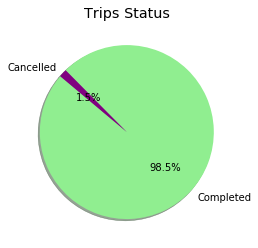

In [35]:
# Calculate the number of trips
trip_status = uber_df["trip_status"].value_counts()

# Calculate the percentage
trip_percent_count = round((trip_status)/len(uber_df['trip_status'])*100,2)

# Create a summary table for trip status
trip_table = pd.DataFrame({"Trip Status": trip_status, "Trip Percent":trip_percent_count})
trip_table

# Create a pie chart for trip status
labels = 'Completed','Cancelled'
sizes = trip_percent_count
colors = ["lightgreen", "purple"]

plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title("Trips Status")


plt.savefig("percent_status_pie_chart.png")
plt.show()

# DRIVER GENDER 'driver_gender'

In [36]:
# Calculate the number of male and female drivers
gender_count = uber_df["driver_gender"].value_counts()

# Calculate the percentage of male and female drivers
percent_count = round((gender_count)/len(uber_df['driver_gender'])*100,2)

# Create a summary table for genders
gender_table = pd.DataFrame({"Gender Count": gender_count, "Gender Percentage":percent_count})
gender_table

,Gender Count,Gender Percentage
Male,659,97.2
Female,19,2.8


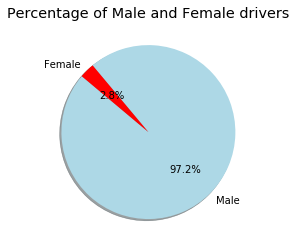

In [37]:
# Create a pie chart for genders
labels = 'Male', 'Female'
sizes = percent_count
colors = ["lightblue", "red"]

plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Male and Female drivers")

plt.savefig("Images/percent_gender_pie_chart.png")
plt.show()

# DRIVER FIRST NAME 'driver_name_en'

In [38]:
# Find drivers first name
drivers_names = pd.DataFrame(uber_df['driver_name_en'])

# Show duplicates first names
drivers_names = drivers_names.groupby(drivers_names.columns.tolist()).size()
names_df = pd.DataFrame(drivers_names).reset_index()

first_name = names_df['driver_name_en']
name_count = names_df[0]

# Show table with all the first names
names_table = pd.DataFrame({"First Name": first_name, "Name Count": name_count})
names_table.head()

,First Name,Name Count
0,Abbos,1
1,Abdula,1
2,Abdullo,1
3,Abuzar,1
4,Ahmad,1


In [39]:
# Create a table with the 15 most popular first names among Uber drivers 
top_names = names_table.nlargest(15,['Name Count']) 
top_names.head()

,First Name,Name Count
10,Aleksandr,54
143,Sergey,40
11,Aleksey,38
18,Andrey,37
51,Dmitriy,29


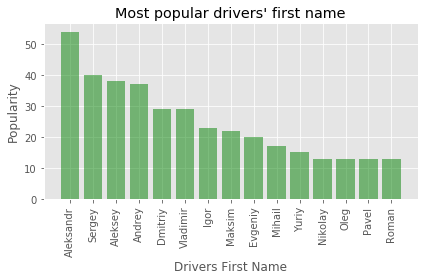

In [40]:
# Create a bar chart with the 15 most popular drivers first name
first_names1 = top_names['First Name']
total_names1 = np.arange(len(first_names1))
popularity1 = top_names['Name Count']

plt.bar(total_names1, popularity1, align='center', alpha=0.5, color='green')
plt.xticks(total_names1, first_names1)
plt.ylabel('Popularity')
plt.xlabel('Drivers First Name')
plt.title("Most popular drivers' first name")
plt.xticks(rotation='vertical')
plt.savefig("Images/popular_names_bar_chart.png")
plt.tight_layout()
plt.show()


# WAIT TIME 'wait_time'

In [41]:
# Show wait time and convert to time format 
wait_df = uber_df['wait_time']
wait_df = pd.to_datetime(uber_df['wait_time'])
pd.DataFrame(wait_df).head()

,wait_time
238,2019-10-03 00:07:32
213,2019-10-03 00:07:21
37,2019-10-03 00:01:17
36,2019-10-03 00:15:29
389,2019-10-03 00:09:16


In [42]:
# Find all the trips dates 
start_df = uber_df['trip_start_time']
start_df = pd.to_datetime(start_df).reset_index()
start_df

trip_number = start_df['index']
trip_date = start_df['trip_start_time']

# Show table with all the trips and dates
trip_dates_df = pd.DataFrame({"Trip Number": trip_number, "Trip Date": trip_date})
trip_dates_df.head()

,Trip Number,Trip Date
0,238,2016-10-08 13:41:00
1,213,2016-09-12 15:44:00
2,37,2015-06-16 11:10:00
3,36,2015-06-16 10:35:00
4,389,2017-08-07 10:26:00


In [43]:
# Show the year and month for each trip 
trip_dates_df['Year'] = trip_dates_df['Trip Date'].apply(lambda line:  str(line.year))
trip_dates_df['Month'] = trip_dates_df['Trip Date'].apply(lambda line:  str(line.month))

new_trip_table = pd.DataFrame({"Trip Number": trip_number, 
                               "Trip Date": trip_date, 
                               "Month": (trip_dates_df['Month']), 
                               "Year": (trip_dates_df['Year']), 
                               "Wait Time by Minutes": (wait_df.dt.minute)})

new_trip_table.head()


,Trip Number,Trip Date,Month,Year,Wait Time by Minutes
0,238,2016-10-08 13:41:00,10,2016,7
1,213,2016-09-12 15:44:00,9,2016,6
2,37,2015-06-16 11:10:00,6,2015,16
3,36,2015-06-16 10:35:00,6,2015,6
4,389,2017-08-07 10:26:00,8,2017,10


In [44]:
# Find the average wait time per month
wait_df_mean = new_trip_table.groupby(['Year','Month'])["Wait Time by Minutes"].mean()
pd.DataFrame(wait_df_mean).head()

Wait Time by Minutes
Year Month                      
2015 10                 8.166667
     11                 8.800000
     12                10.571429
     5                  8.333333
     6                  6.342857

In [45]:
# Find the maximum wait time per month
wait_df_by_max = new_trip_table.groupby(['Year','Month'])["Wait Time by Minutes"].max()
pd.DataFrame(wait_df_by_max).head()

Wait Time by Minutes
Year Month                      
2015 10                       13
     11                       16
     12                       17
     5                        15
     6                        18

In [46]:
# Find the minimum wait time per month
wait_df_by_min = new_trip_table.groupby(['Year','Month'])["Wait Time by Minutes"].min()
pd.DataFrame(wait_df_by_min).head()

Wait Time by Minutes
Year Month                      
2015 10                        3
     11                        2
     12                        1
     5                         2
     6                         0

In [47]:
all_wait_df = pd.DataFrame({"Maximum Wait": (wait_df_by_max), 
                          "Average Wait": (wait_df_mean), 
                            "Minimum Wait": (wait_df_by_min)})
pd.DataFrame(all_wait_df).head()

Maximum Wait  Average Wait  Minimum Wait
Year Month                                          
2015 10               13      8.166667             3
     11               16      8.800000             2
     12               17     10.571429             1
     5                15      8.333333             2
     6                18      6.342857             0

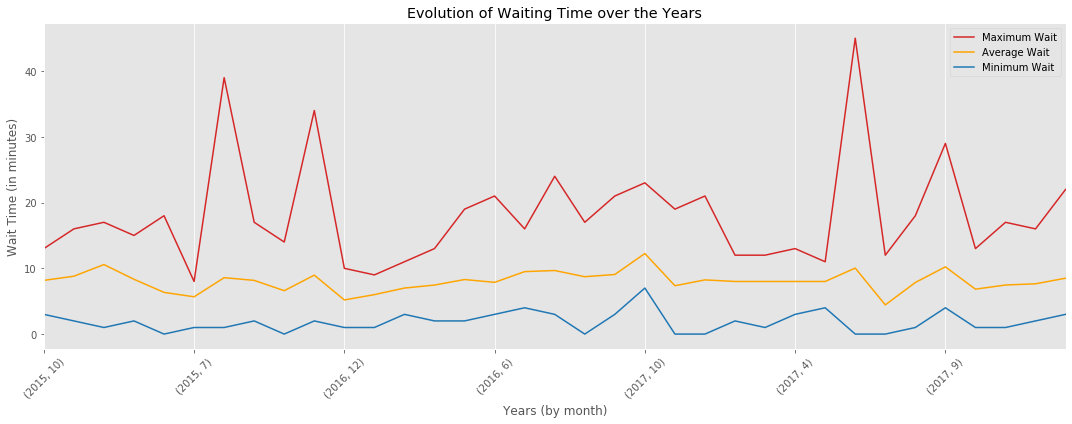

In [48]:
# Create a line graph showing the average, minimum and maximum wait time for each month
all_wait_df.plot(style='-', color =('tab:red', 'orange', 'tab:blue'),figsize=(15,6))

plt.xlabel("Years (by month)")
plt.ylabel("Wait Time (in minutes)")
plt.legend(loc="best")
plt.title("Evolution of Waiting Time over the Years")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.savefig("Images/wait_time_line_chart.png")
plt.tight_layout()
plt.show()


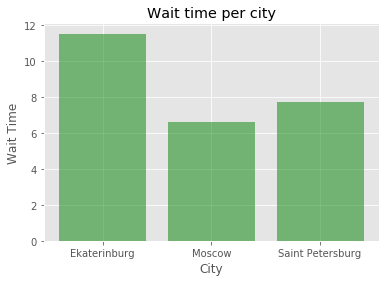

In [49]:
# Same, grouped by city
new_trip_table2 = pd.DataFrame({"Wait Time by Minutes": (wait_df.dt.minute), "City": (uber_df['city'])})
new_trip_table2

new_trip_table2 = new_trip_table2.groupby(['City'])['Wait Time by Minutes'].mean().reset_index()
pd.DataFrame(new_trip_table2).head()

new_trip_table2['City']

# create a bar chart grouped by city 
first_names12 = new_trip_table2['City']
total_names12 = np.arange(len(first_names12))
popularity12 = new_trip_table2['Wait Time by Minutes']

plt.bar(total_names12, popularity12, align='center', alpha=0.5, color='green')
plt.xticks(total_names12, first_names12)
plt.ylabel('Wait Time')
plt.xlabel('City')
plt.title("Wait time per city")


plt.savefig("wait_time_bar.png")
plt.show()


# UBER Rush time Anlysis using Russia state data 

In [50]:
uber_data = pd.DataFrame(uber_df, columns= ["trip_start_time","pickup_lat","pickup_long","wait_time"])

uber_data = uber_data.rename(columns={"trip_start_time": "Date/Time", "pickup_lat": "lat","pickup_long": "long" })
uber_data.head()

,Date/Time,lat,long,wait_time
238,2016-10-08 13:41:00,59.940730,30.420205,00:07:32
213,2016-09-12 15:44:00,59.931748,30.356268,00:07:21
37,2015-06-16 11:10:00,59.931435,30.322819,00:01:17
36,2015-06-16 10:35:00,59.918865,30.286253,00:15:29
389,2017-08-07 10:26:00,59.799698,30.274180,00:09:16


In [51]:
#Convert The Date time column into Date, Time and Hour Column for detailed analysis
uber_data["Times"] = ""
tripDate = pd.to_datetime(uber_data["Date/Time"])
uber_data = uber_data.assign(Times = tripDate)
uber_data["Hour"] = uber_data.Times.dt.hour # Split of Hour from Datetime Stamp
uber_data["Date"] = uber_data.Times.dt.date # Split of Date from Datetime Stamp
uber_data["Times"] = uber_data.Times.dt.time # Split of Time from Datetime Stamp
uber_data["WaitTimeInMinutes"] = pd.DatetimeIndex(uber_data["wait_time"]).minute # Split of Time from Datetime Stamp
uber_data["Year"] = pd.DatetimeIndex(uber_data["Date"]).year
uber_data.head()

,Date/Time,lat,long,wait_time,Times,Hour,Date,WaitTimeInMinutes,Year
238,2016-10-08 13:41:00,59.940730,30.420205,00:07:32,13:41:00,13,2016-10-08,7,2016
213,2016-09-12 15:44:00,59.931748,30.356268,00:07:21,15:44:00,15,2016-09-12,7,2016
37,2015-06-16 11:10:00,59.931435,30.322819,00:01:17,11:10:00,11,2015-06-16,1,2015
36,2015-06-16 10:35:00,59.918865,30.286253,00:15:29,10:35:00,10,2015-06-16,15,2015
389,2017-08-07 10:26:00,59.799698,30.274180,00:09:16,10:26:00,10,2017-08-07,9,2017


In [52]:
# Calculating the City Name using the latitude and Longitude using CitiPy package
# Performance optimisation was perfromed to process 1mn records faster
uber_data["CityName"] = ""
for row in uber_data.itertuples():     
     uber_data["CityName"][row.Index] = citipy.nearest_city(row.lat,row.long).city_name    

uber_data.head()

C:\Users\aga641\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date/Time,lat,long,wait_time,Times,Hour,Date,WaitTimeInMinutes,Year,CityName
238,2016-10-08 13:41:00,59.940730,30.420205,00:07:32,13:41:00,13,2016-10-08,7,2016,murino
213,2016-09-12 15:44:00,59.931748,30.356268,00:07:21,15:44:00,15,2016-09-12,7,2016,saint petersburg
37,2015-06-16 11:10:00,59.931435,30.322819,00:01:17,11:10:00,11,2015-06-16,1,2015,saint petersburg
36,2015-06-16 10:35:00,59.918865,30.286253,00:15:29,10:35:00,10,2015-06-16,15,2015,saint petersburg
389,2017-08-07 10:26:00,59.799698,30.274180,00:09:16,10:26:00,10,2017-08-07,9,2017,aleksandrovskaya


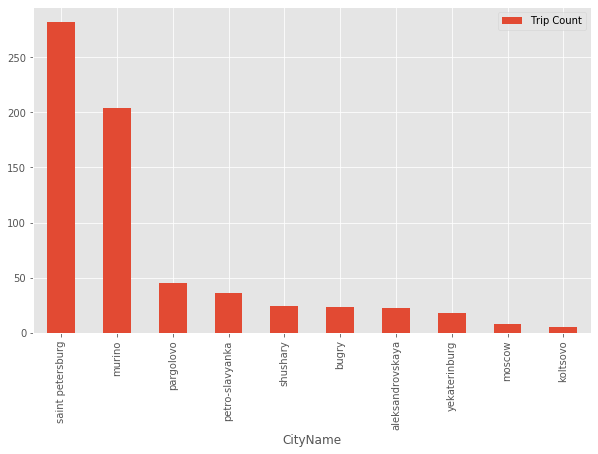

In [53]:
#Bar Plotting for Top 10 City for Rush City Analysis by count of trips in the city
uberTripsByCity = uber_data.groupby(["CityName"])["CityName"].count()
uberSummaryTrips2DF = pd.DataFrame({ "Trip Count": uberTripsByCity })
uberSummaryTrips2DF = uberSummaryTrips2DF.sort_values(by=["Trip Count"], ascending = False)
uberSummaryTrips2DF = uberSummaryTrips2DF.reset_index()
uberSummaryTrips2DF = uberSummaryTrips2DF.head(10)
uberSummaryTrips2DF.plot("CityName", "Trip Count",kind="bar",figsize=(10,6))
plt.savefig('Images/Top 10 City for Rush City Analysis.png')
plt.show()

In [54]:
#This code is to derive trip analysis for all cities of UBER Data processed 

uberTripsByTime = uber_data.groupby("Hour")["Hour"].count()
rush_hour_df = pd.DataFrame({ "Trip Count": uberTripsByTime })
#rush_hour_df = rush_hour_df.sort_values(by=["Trip Count"], ascending = False)
rush_hour_df = rush_hour_df.reset_index()
rush_hour_df.head(10)

,Hour,Trip Count
0,0,9
1,1,3
2,3,4
3,4,3
4,5,9
5,7,13
6,8,16
7,9,37
8,10,61
9,11,58


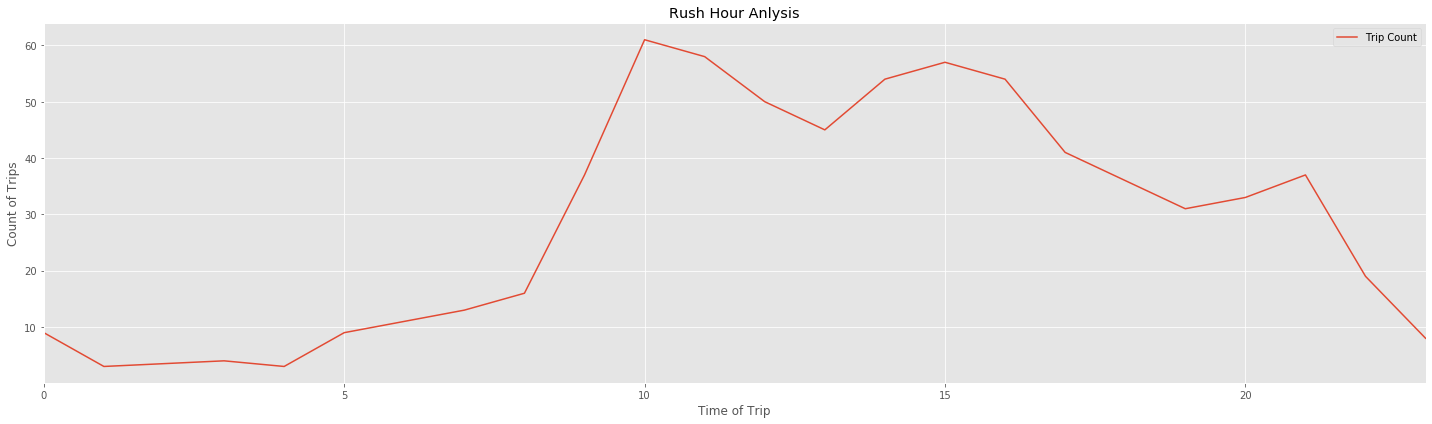

In [55]:
# Generate a bar plot showing number of data points for each Hour of Day using pandas to perfrom Rush Hour Analysis
rush_hour_df.plot("Hour", "Trip Count",kind="line",figsize=(20,6))
# Set a title for the chart
plt.title(f"Rush Hour Anlysis")
plt.xlabel("Time of Trip")
plt.ylabel("Count of Trips")
plt.tight_layout()
plt.savefig('Images/Rush_hourAnalysis.png')
plt.show()

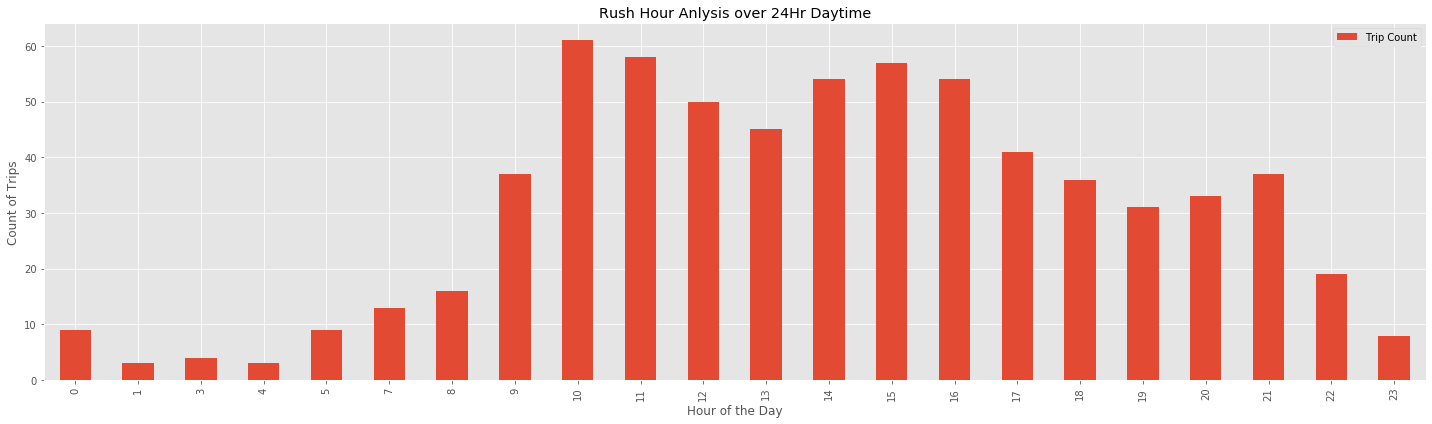

In [56]:
# Generate a bar plot to show Peak Rush Hour to Lowest Rush Hour using pandas
rush_hour_df.plot("Hour", "Trip Count",kind="bar",figsize=(20,6))
# Set a title for the chart
plt.title(f"Rush Hour Anlysis over 24Hr Daytime")
plt.xlabel("Hour of the Day")
plt.ylabel("Count of Trips")
plt.tight_layout()
plt.savefig('Images/Rush_hourAnalysis_bar.png')
plt.show()

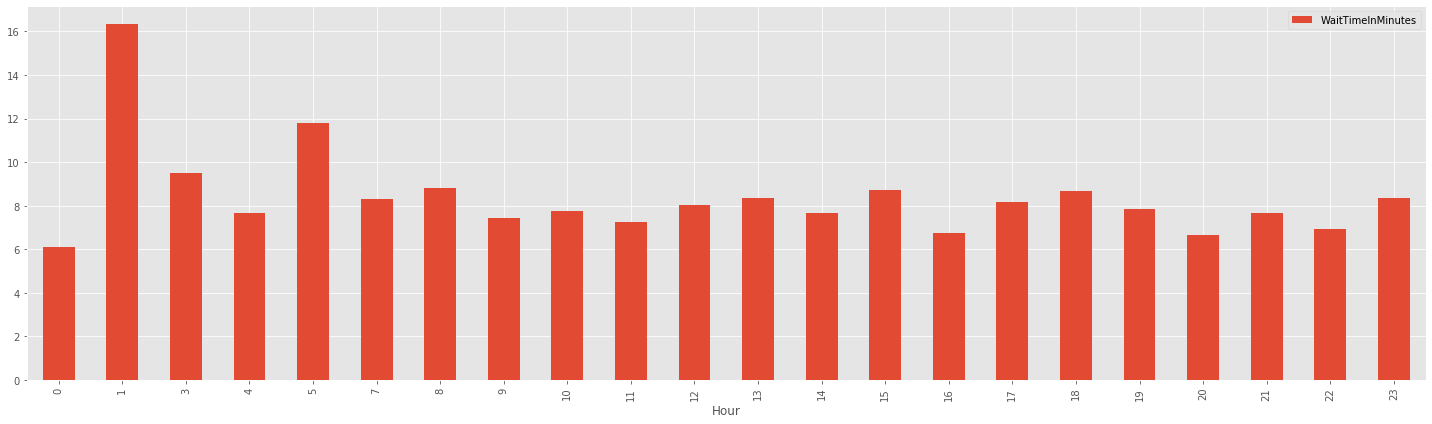

In [57]:
#Bar Plotting for Rush Hour Analysis based on wait time in each Hour of Day 
uberTripsByCity = uber_data.groupby("Hour")["WaitTimeInMinutes"].mean()
uberTripsByCity = uberTripsByCity.reset_index()
uberSummaryTrips2DF = pd.DataFrame(uberTripsByCity,columns=["Hour","WaitTimeInMinutes"])
#uberSummaryTrips2DF = uberSummaryTrips2DF.reset_index()
# uberSummaryTrips2DF = uberSummaryTrips2DF.head(10)
uberSummaryTrips2DF.plot("Hour","WaitTimeInMinutes",kind="bar",figsize=(20,6))
plt.savefig('Images/waittime_in_Rush_Hour.png')
plt.tight_layout()
plt.show()

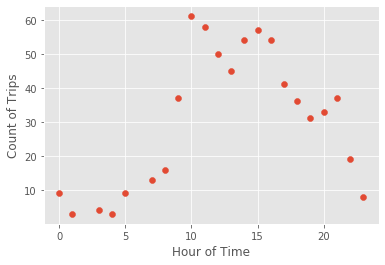

In [58]:
# Generate a scatter plot to show count of trips over 24 hour window

plt.scatter(rush_hour_df['Hour'],rush_hour_df['Trip Count'])
plt.xlabel('Hour of Time')
plt.ylabel('Count of Trips')
plt.show()

The correlation coefficient between both factors is 0.42
The regression values for each hour of the day as part of linear regression model is:
0     15.929897
1     17.152069
2     19.596415
3     20.818587
4     22.040760
5     24.485105
6     25.707278
7     26.929451
8     28.151623
9     29.373796
10    30.595969
11    31.818141
12    33.040314
13    34.262487
14    35.484659
15    36.706832
16    37.929005
17    39.151177
18    40.373350
19    41.595523
20    42.817695
21    44.039868
Name: Hour, dtype: float64
The r-squared is: 0.42057648646894996


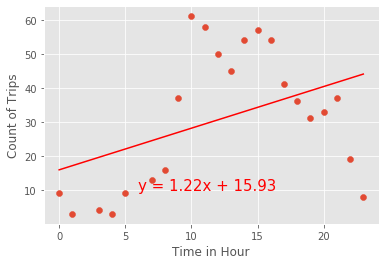

In [59]:
# Calculate the correlation coefficient and linear regression model for Hour of day time 
# and Trip Count for the UBER Data
# Coorelation was identified to be pretty good with 0.8 coorelation coefficient.

Hour_Time = rush_hour_df['Hour']
Trip_Count = rush_hour_df['Trip Count']
correlation = st.pearsonr(Hour_Time,Trip_Count)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

# Calculate the linear regression model for for Hour of day time and Trip Count for the UBER Data
x_values = rush_hour_df['Hour']
y_values = rush_hour_df['Trip Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print("The regression values for each hour of the day as part of linear regression model is:")
print(regress_values)

# Plot the linear regression model on top of the previous scatter plot.
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Time in Hour')
plt.ylabel('Count of Trips')
print(f"The r-squared is: {rvalue}")
plt.show()

# UBER Anlysis using New york state data for BIG data volumes

In [60]:
# File to Load Uber Raw Data from Sep 2014 (1 million records) and Create a dictionary of raw data
file_to_load = "Resources/uber-raw-data-sep14.csv"

# Read UBER Data File and store into Pandas data frame. This data Frame will carry million records
uber_data_newyork = pd.read_csv(file_to_load)
uber_data_newyork = pd.DataFrame(uber_data_newyork, columns= ["Date/Time","Lat","Lon"])
uber_data=uber_data_newyork.head(40000)
uber_data.head()

,Date/Time,Lat,Lon
0,9/1/2014 0:01:00,40.2201,-74.0021
1,9/1/2014 0:01:00,40.7500,-74.0027
2,9/1/2014 0:03:00,40.7559,-73.9864
3,9/1/2014 0:06:00,40.7450,-73.9889
4,9/1/2014 0:11:00,40.8145,-73.9444


In [61]:
#Convert The Date time column into Date, Time and Hour Column for detailed analysis
uber_data["Times"] = ""
tripDate = pd.to_datetime(uber_data["Date/Time"])
uber_data = uber_data.assign(Times = tripDate)
uber_data["Hour"] = uber_data.Times.dt.hour # Split of Hour from Datetime Stamp
uber_data["Date"] = uber_data.Times.dt.date # Split of Date from Datetime Stamp
uber_data["Times"] = uber_data.Times.dt.time # Split of Time from Datetime Stamp
uber_data.head()

C:\Users\aga641\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date/Time,Lat,Lon,Times,Hour,Date
0,9/1/2014 0:01:00,40.2201,-74.0021,00:01:00,0,2014-09-01
1,9/1/2014 0:01:00,40.7500,-74.0027,00:01:00,0,2014-09-01
2,9/1/2014 0:03:00,40.7559,-73.9864,00:03:00,0,2014-09-01
3,9/1/2014 0:06:00,40.7450,-73.9889,00:06:00,0,2014-09-01
4,9/1/2014 0:11:00,40.8145,-73.9444,00:11:00,0,2014-09-01


In [62]:
# Calculating the City Name using the latitude and Longitude using CitiPy package
# Performance optimisation was perfromed to process 1mn records faster
uber_data["CityName"] = ""

for row in uber_data.itertuples():     
     uber_data["CityName"][row.Index] = citipy.nearest_city(row.Lat,row.Lon).city_name    

uber_data.head()


C:\Users\aga641\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date/Time,Lat,Lon,Times,Hour,Date,CityName
0,9/1/2014 0:01:00,40.2201,-74.0021,00:01:00,0,2014-09-01,asbury park
1,9/1/2014 0:01:00,40.7500,-74.0027,00:01:00,0,2014-09-01,weehawken
2,9/1/2014 0:03:00,40.7559,-73.9864,00:03:00,0,2014-09-01,weehawken
3,9/1/2014 0:06:00,40.7450,-73.9889,00:06:00,0,2014-09-01,new york
4,9/1/2014 0:11:00,40.8145,-73.9444,00:11:00,0,2014-09-01,edgewater


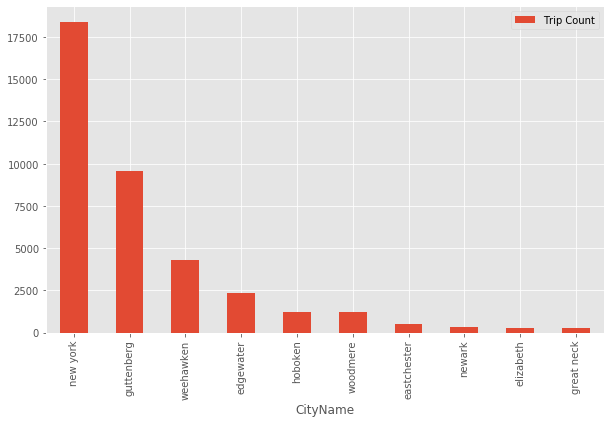

In [63]:
#Bar Plotting for Top 10 City for Rush City Analysis by count of trips in the city
uberTripsByCity = uber_data.groupby(["CityName"])["CityName"].count()
uberSummaryTrips2DF = pd.DataFrame({ "Trip Count": uberTripsByCity })
uberSummaryTrips2DF = uberSummaryTrips2DF.sort_values(by=["Trip Count"], ascending = False)
uberSummaryTrips2DF = uberSummaryTrips2DF.reset_index()
uberSummaryTrips2DF = uberSummaryTrips2DF.head(10)
uberSummaryTrips2DF.plot("CityName", "Trip Count",kind="bar",figsize=(10,6))
plt.show()

In [64]:
#This code is to derive trip analysis for all cities of UBER Data processed 

uberTripsByTime = uber_data.groupby("Hour")["Hour"].count()
rush_hour_df = pd.DataFrame({ "Trip Count": uberTripsByTime })
#rush_hour_df = rush_hour_df.sort_values(by=["Trip Count"], ascending = False)
rush_hour_df = rush_hour_df.reset_index()
rush_hour_df.head(10)

,Hour,Trip Count
0,0,889
1,1,510
2,2,325
3,3,390
4,4,495
5,5,826
6,6,1368
7,7,1666
8,8,1518
9,9,1362


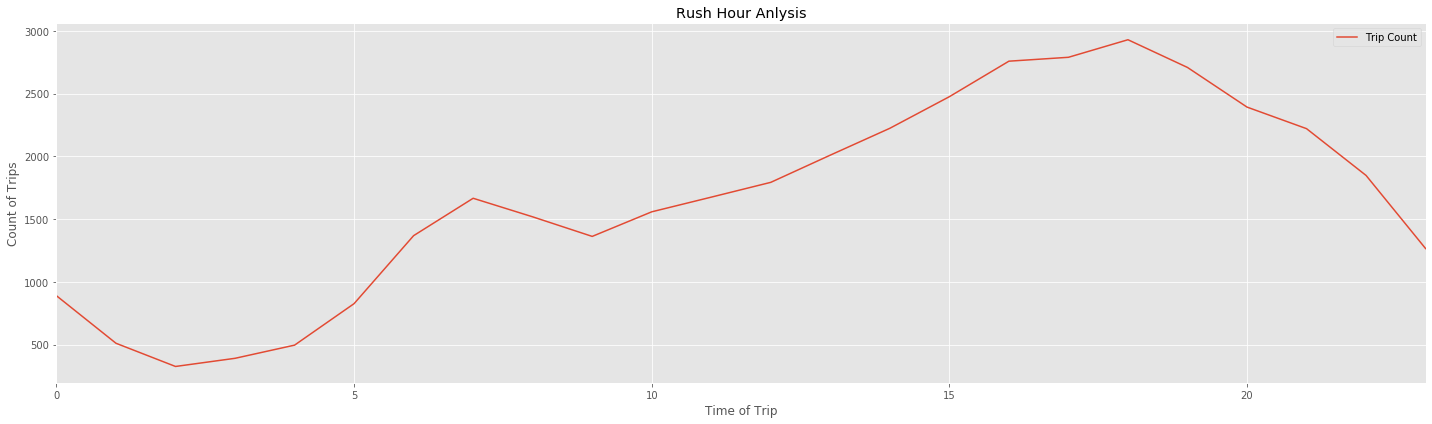

In [65]:
# Generate a bar plot showing number of data points for each Hour of Day using pandas to perfrom Rush Hour Analysis
rush_hour_df.plot("Hour", "Trip Count",kind="line",figsize=(20,6))
# Set a title for the chart
plt.title(f"Rush Hour Anlysis")
plt.xlabel("Time of Trip")
plt.ylabel("Count of Trips")
plt.tight_layout()

plt.show()


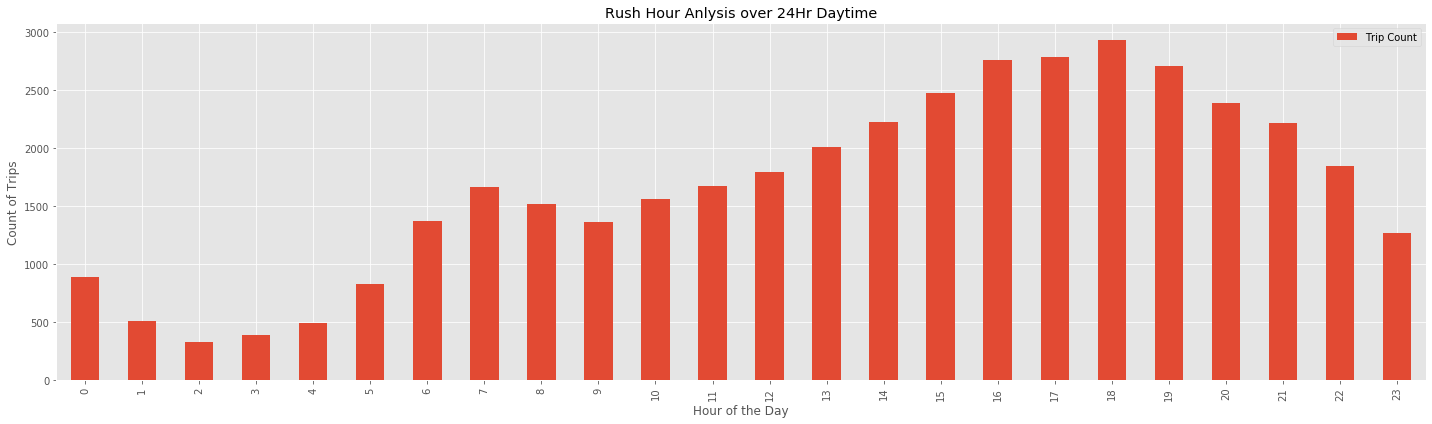

In [66]:
# Generate a bar plot to show Peak Rush Hour to Lowest Rush Hour using pandas
rush_hour_df.plot("Hour", "Trip Count",kind="bar",figsize=(20,6))
# Set a title for the chart
plt.title(f"Rush Hour Anlysis over 24Hr Daytime")
plt.xlabel("Hour of the Day")
plt.ylabel("Count of Trips")
plt.tight_layout()

plt.show()

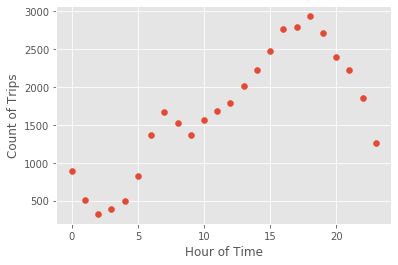

In [67]:
# Generate a scatter plot to show count of trips over 24 hour window

plt.scatter(rush_hour_df['Hour'],rush_hour_df['Trip Count'])
plt.xlabel('Hour of Time')
plt.ylabel('Count of Trips')
plt.show()

The correlation coefficient between both factors is 0.78
The regression values for each hour of the day as part of linear regression model is:
0      639.906667
1      729.190145
2      818.473623
3      907.757101
4      997.040580
5     1086.324058
6     1175.607536
7     1264.891014
8     1354.174493
9     1443.457971
10    1532.741449
11    1622.024928
12    1711.308406
13    1800.591884
14    1889.875362
15    1979.158841
16    2068.442319
17    2157.725797
18    2247.009275
19    2336.292754
20    2425.576232
21    2514.859710
22    2604.143188
23    2693.426667
Name: Hour, dtype: float64
The r-squared is: 0.7834820468519451


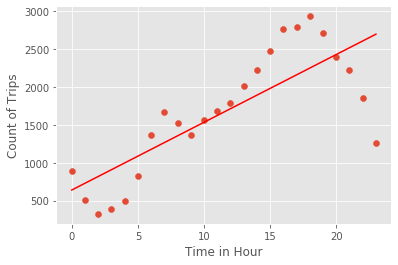

In [68]:
# Calculate the correlation coefficient and linear regression model for Hour of day time 
# and Trip Count for the UBER Data
# Coorelation was identified to be pretty good with 0.8 coorelation coefficient.

Hour_Time = rush_hour_df['Hour']
Trip_Count = rush_hour_df['Trip Count']
correlation = st.pearsonr(Hour_Time,Trip_Count)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

# Calculate the linear regression model for for Hour of day time and Trip Count for the UBER Data
x_values = rush_hour_df['Hour']
y_values = rush_hour_df['Trip Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print("The regression values for each hour of the day as part of linear regression model is:")
print(regress_values)

# Plot the linear regression model on top of the previous scatter plot.
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Time in Hour')
plt.ylabel('Count of Trips')
print(f"The r-squared is: {rvalue}")
plt.show()